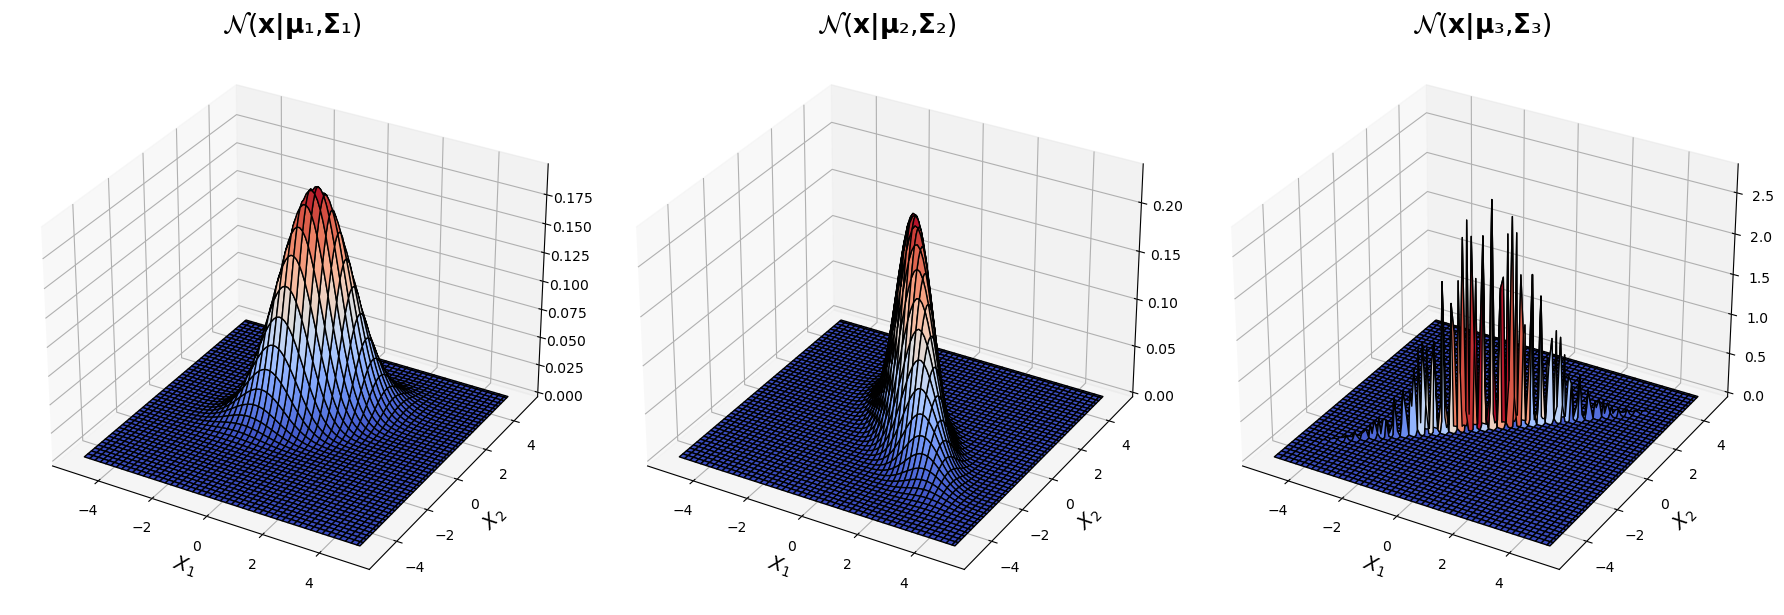

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the 2dGaussians
mus = [np.array([0, 1]),    # mu_1
       np.array([1, -0.5]), # mu_2
       np.array([0, 0])]    # mu_3

delta = 0.075
Sigmas = [np.array([[1, 0.5], [0.5, 0.9]]),                 # Sigma_1
          np.array([[1, -0.8], [-0.8, 1.1]]),               # Sigma_2
          np.array([[1.5 + delta, 1.3], [1.3, 1 + delta]])] # Sigma_3

# Set up the grid for plotting
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

j = list('₁₂₃')
fig = plt.figure(figsize=(18, 6))
for i, (mu, Sigma) in enumerate(zip(mus, Sigmas)):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    
    # Gaussian density
    rv = multivariate_normal(mu, Sigma)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    Z = rv.pdf(pos)
    
    # the surface
    ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='black')
    
    ax.set_title('$\mathcal{N}$($\mathbf{x | \mu}$'+f'{j[i]}'+',$\mathbf{\Sigma}$'+f'{j[i]})', size=19)
    ax.set_xlabel('$X_1$', size=14)
    ax.set_ylabel('$X_2$', size= 14)

plt.tight_layout()
plt.show()